Saving titanic3.xls to titanic3 (1).xls
Primeiras linhas da base original:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  Na

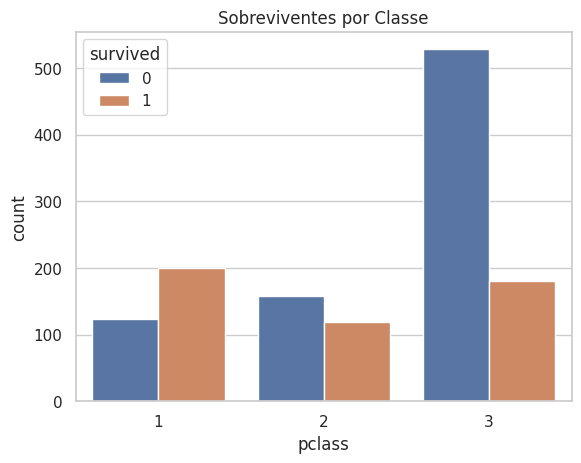

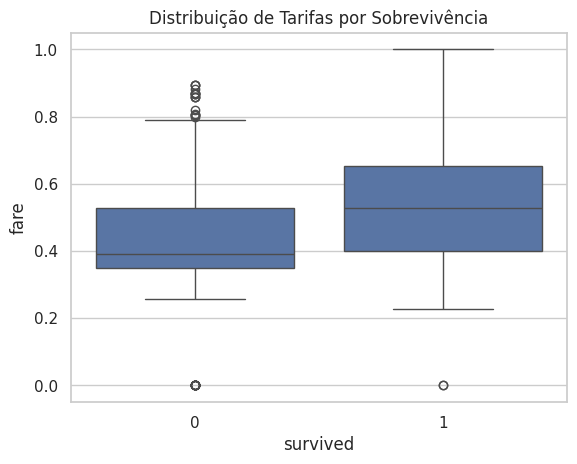

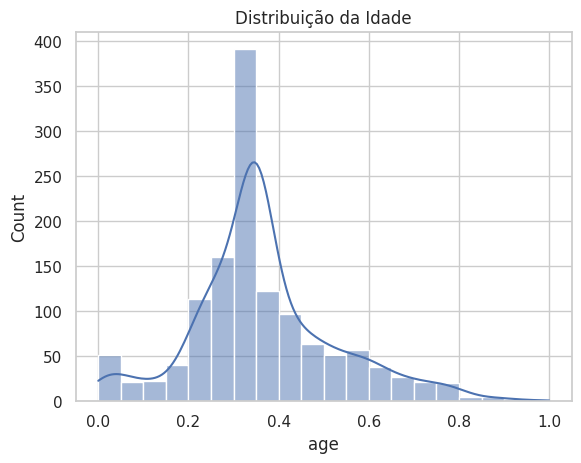

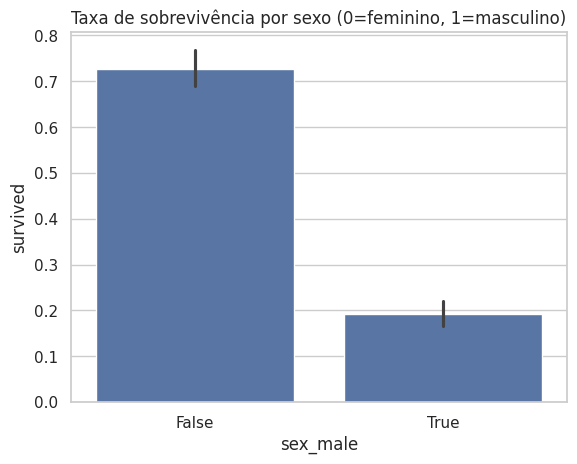


Primeiras linhas da base preparada:
   pclass  survived                                             name  \
0       1         1                    Allen, Miss. Elisabeth Walton   
1       1         1                   Allison, Master. Hudson Trevor   
2       1         0                     Allison, Miss. Helen Loraine   
3       1         0             Allison, Mr. Hudson Joshua Creighton   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

        age  sibsp  parch  ticket      fare boat   body  \
0  0.361169      0      0   24160  0.858556    2    NaN   
1  0.009395      1      2  113781  0.805569   11    NaN   
2  0.022964      1      2  113781  0.805569  NaN    NaN   
3  0.373695      1      2  113781  0.805569  NaN  135.0   
4  0.311064      1      2  113781  0.805569  NaN    NaN   

                         home.dest  sex_male  embarked_Q  embarked_S  
0                     St Louis, MO     False       False        True  
1  Montreal, PQ / Chesterville, O

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")

from google.colab import files
uploaded = files.upload()

df = pd.read_excel("titanic3.xls")

print("Primeiras linhas da base original:")
print(df.head())

print("\nInformações da base:")
print(df.info())

print("\nEstatísticas descritivas iniciais:")
print(df.describe())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = df.drop(columns=['cabin'])

df = df.drop_duplicates()

df['fare'] = df['fare'].apply(lambda x: np.log(x + 1))

df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Sobreviventes por Classe")
plt.show()

sns.boxplot(x='survived', y='fare', data=df)
plt.title("Distribuição de Tarifas por Sobrevivência")
plt.show()

sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribuição da Idade")
plt.show()

sns.barplot(x='sex_male', y='survived', data=df)
plt.title("Taxa de sobrevivência por sexo (0=feminino, 1=masculino)")
plt.show()

print("\nPrimeiras linhas da base preparada:")
print(df.head())

print("\nEstatísticas descritivas da base preparada:")
print(df.describe())